In [30]:
import torch
import torchaudio
import IPython
from IPython.display import Audio
import matplotlib.pyplot as plt
import os
import math

In [31]:
import requests

path = "./audio/steam-train-whistle-daniel_simon.wav"
url = "https://pytorch-tutorial-assets.s3.amazonaws.com/steam-train-whistle-daniel_simon.wav"
with open(path, 'wb') as file_:
      file_.write(requests.get(url).content)

In [32]:
wav_file = './audio/steam-train-whistle-daniel_simon.wav'

metadata = torchaudio.info(wav_file)
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=109368, num_channels=2, bits_per_sample=16, encoding=PCM_S)


In [33]:
IPython.display.Audio(wav_file, autoplay=False) 


In [34]:
def print_stats(waveform, sample_rate=None):
    if sample_rate:
        print("Sample Rate:", sample_rate)
    print("維度:", tuple(waveform.shape))
    print("資料型態:", waveform.dtype)
    print(f" - 最大值:         {waveform.max().item():6.3f}")
    print(f" - 最小值:         {waveform.min().item():6.3f}")
    print(f" - 平均數:        {waveform.mean().item():6.3f}")
    print(f" - 標準差: {waveform.std().item():6.3f}")
    print()
    print(waveform)
    print()


In [35]:
#波形
def plot_waveform(waveform, sample_rate, title = 'Waveform', xlim = None, ylim = None):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f'Channel {c+1}')
        if xlim:
            axes[c].set_xlim(xlim)
        if ylim:
            axes[c].set_ylim(ylim)
    figure.suptitle(title)
    plt.show(block=False)

In [36]:
#頻譜
def plot_specgram(waveform, sample_rate, title = 'Spectrogram', xlim = None):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f'Channel {c+1}')
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)
    

In [37]:
def play_audio(waveform, sample_rate):
    num_channels, num_frames = waveform.shape
    if num_channels == 1:
        display(Audio(waveform[0], rate=sample_rate))
    elif num_channels == 2:
        display(Audio((waveform[0], waveform[1]), rate=sample_rate))
    else:
        raise ValueError("不支援超過雙聲道的音檔.")
        

In [38]:
def inspect_file(path):
    print("-" * 10)
    print("Source:", path)
    print("-" * 10)
    print(f" - File size: {os.path.getsize(path)} bytes")
    print(f" - {torchaudio.info(path)}")

In [39]:
waveform, sample_rate = torchaudio.load(wav_file)
print_stats(waveform, sample_rate=sample_rate)

Sample Rate: 44100
維度: (2, 109368)
資料型態: torch.float32
 - 最大值:          0.508
 - 最小值:         -0.449
 - 平均數:         0.000
 - 標準差:  0.118

tensor([[ 0.0027,  0.0063,  0.0092,  ...,  0.0032,  0.0047,  0.0052],
        [-0.0038, -0.0015,  0.0013,  ..., -0.0032, -0.0012, -0.0003]])



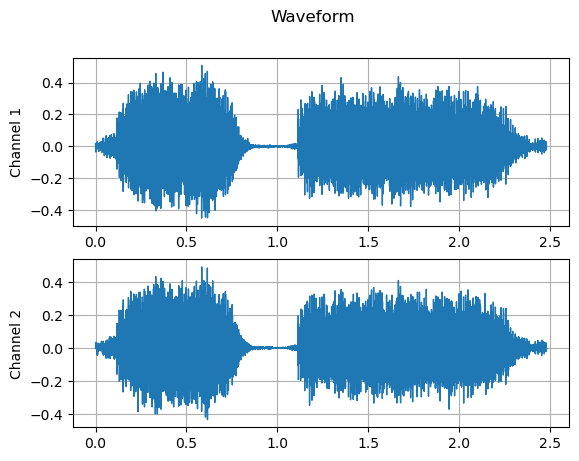

In [40]:
plot_waveform(waveform, sample_rate)


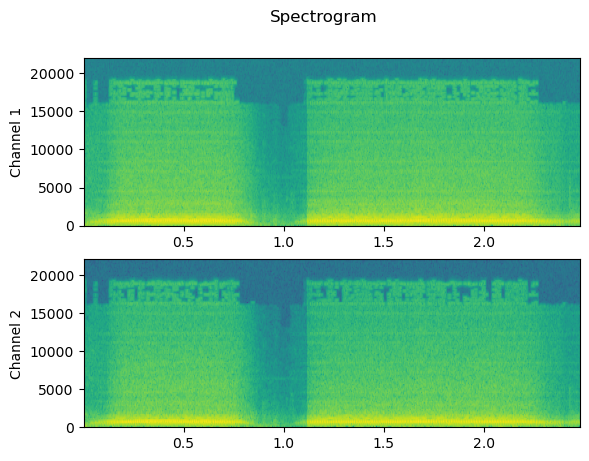

In [41]:
plot_specgram(waveform, sample_rate)


In [42]:
path = "./audio/PCM_S16.wav"
torchaudio.save(
    path, waveform, sample_rate,
    encoding="PCM_S", bits_per_sample=16)
inspect_file(path)

----------
Source: ./audio/PCM_S16.wav
----------
 - File size: 437516 bytes
 - AudioMetaData(sample_rate=44100, num_frames=109368, num_channels=2, bits_per_sample=16, encoding=PCM_S)


In [43]:
path = "./audio/steam-train-whistle-daniel_simon.wav"
inspect_file(path)

----------
Source: ./audio/steam-train-whistle-daniel_simon.wav
----------
 - File size: 437516 bytes
 - AudioMetaData(sample_rate=44100, num_frames=109368, num_channels=2, bits_per_sample=16, encoding=PCM_S)


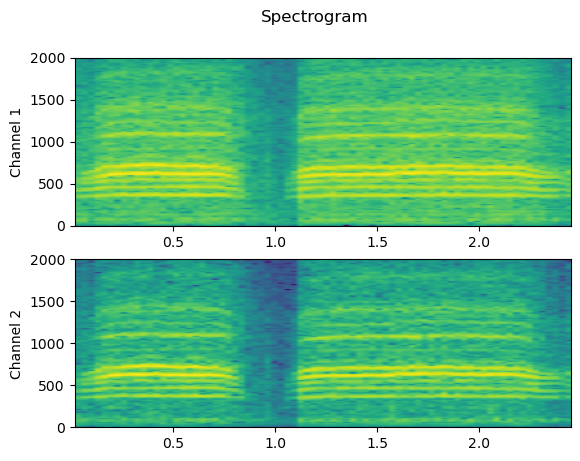

In [44]:
import torchaudio.functional as F

resample_rate = 4000

resampled_waveform = F.resample(waveform, sample_rate, resample_rate)
plot_specgram(resampled_waveform, resample_rate)


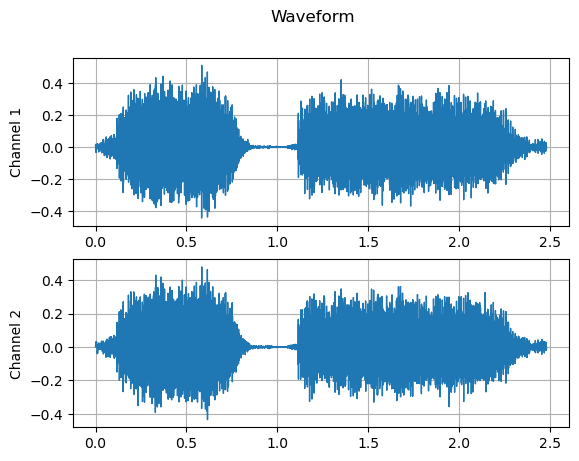

In [45]:
plot_waveform(resampled_waveform, resample_rate)


In [46]:
path = "./audio/resample.wav"
torchaudio.save(path, resampled_waveform, resample_rate)

IPython.display.Audio(wav_file, autoplay=False) 

In [49]:
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

wav_file = './audio/speech.wav'
waveform, sample_rate = torchaudio.load(wav_file)

In [50]:
def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or 'Spectrogram (db)')
    axs.set_ylabel(ylabel)
    axs.set_xlabel('frame')
    im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

In [68]:
n_fft = 1024
win_length = None
hop_length = 512

In [69]:
spectrogram = T.Spectrogram(
    n_fft=n_fft,           
    win_length=win_length, 
    hop_length=hop_length, 
    center=True,           
    pad_mode="reflect",    
    power=2.0,             
)

維度: (1, 513, 107)
資料型態: torch.float32
 - 最大值:         4000.533
 - 最小值:          0.000
 - 平均數:         5.726
 - 標準差: 70.301

tensor([[[7.8743e+00, 4.4462e+00, 5.6781e-01,  ..., 2.7694e+01,
          8.9546e+00, 4.1289e+00],
         [7.1094e+00, 3.2595e+00, 7.3520e-01,  ..., 1.7141e+01,
          4.4812e+00, 8.0840e-01],
         [3.8374e+00, 8.2490e-01, 3.0779e-01,  ..., 1.8502e+00,
          1.1777e-01, 1.2369e-01],
         ...,
         [3.4701e-07, 1.0604e-05, 1.2395e-05,  ..., 7.4091e-06,
          8.2059e-07, 1.0176e-05],
         [4.7174e-05, 4.4331e-07, 3.9444e-05,  ..., 3.0622e-05,
          3.9737e-07, 8.1568e-06],
         [1.3221e-04, 1.6440e-05, 7.2536e-05,  ..., 5.4662e-05,
          1.1663e-05, 2.5758e-06]]])



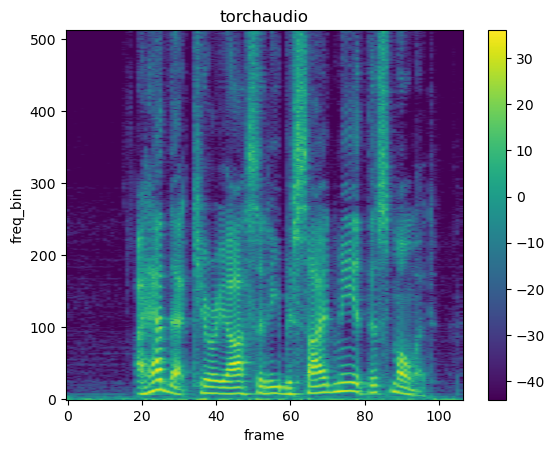

In [70]:
spec = spectrogram(waveform)
print_stats(spec)
plot_spectrogram(spec[0], title='torchaudio')

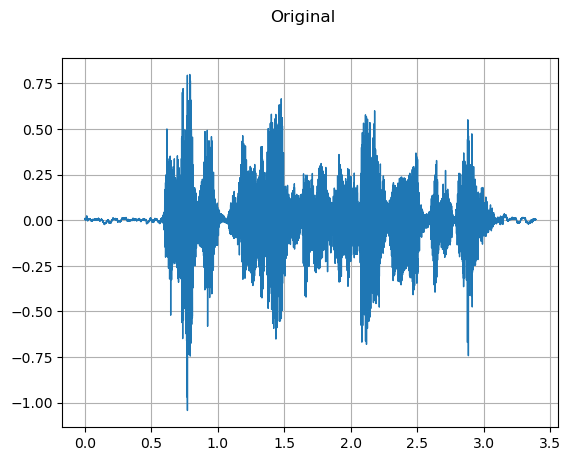

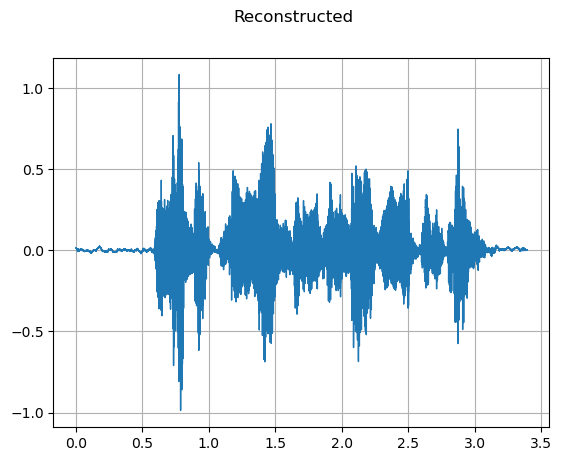

In [77]:
plot_waveform(waveform, sample_rate, title="Original")
griffin_lim = T.GriffinLim(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
)
waveform = griffin_lim(spec)

plot_waveform(waveform, sample_rate, title="Reconstructed")

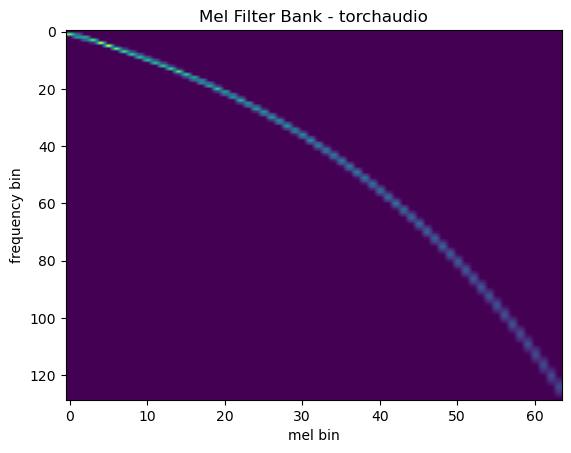

In [78]:
# FBank 繪圖
def plot_mel_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or 'Filter bank')
    axs.imshow(fbank, aspect='auto')
    axs.set_ylabel('frequency bin')
    axs.set_xlabel('mel bin')
    plt.show(block=False)

n_fft = 256
n_mels = 64
sample_rate = 6000

mel_filters = F.melscale_fbanks(
    int(n_fft // 2 + 1), 
    n_mels=n_mels,        
    f_min=0.,             
    f_max=sample_rate/2., 
    sample_rate=sample_rate, 
    norm='slaney'         
)
plot_mel_fbank(mel_filters, "Mel Filter Bank - torchaudio")

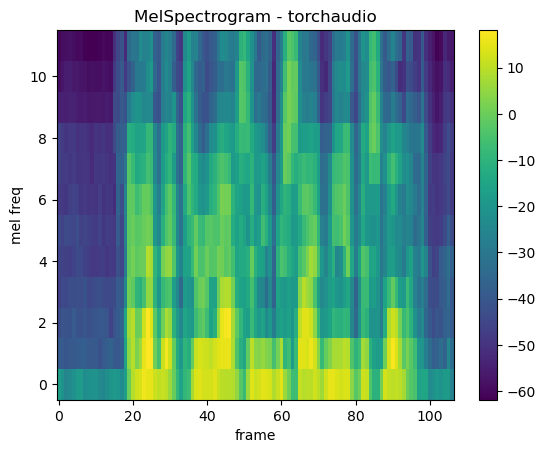

In [79]:
n_fft = 1024
win_length = None
hop_length = 512
n_mels = 12

mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate, # 取樣率
    n_fft=n_fft,             # 快速傅立葉轉換的長度(Size of FFT)
    win_length=win_length, # 視窗大小(Window size)
    hop_length=hop_length, # 視窗終非重疊的Hop length)
    center=True,           # 是否在音訊前後補資料，使t時間點的框居中
    pad_mode="reflect",    # 補資料的方式
    power=2.0,             # 時頻大小的指數(Exponent for the magnitude spectrogram)
    norm='slaney',         # 區域常態化(Area normalization)
    onesided=True,         # 只傳回一半得結果，避免重複
    n_mels=n_mels,         # FBank 個數
    mel_scale="htk",       # htk or slaney    
)

melspec = mel_spectrogram(waveform)
plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel='mel freq')

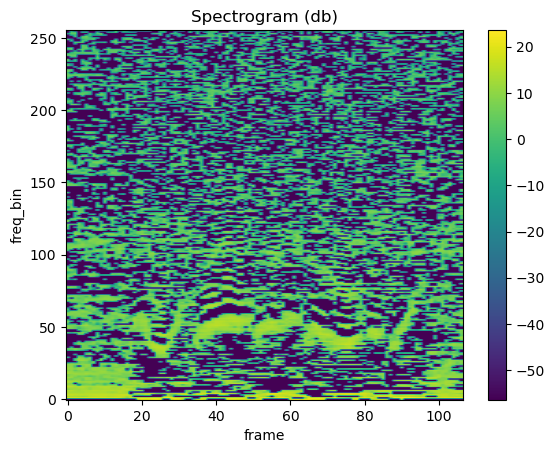

In [80]:
n_fft = 2048
win_length = None
hop_length = 512
n_mels = 256
n_mfcc = 256

mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,   # MFCC 個數
    melkwargs={
      'n_fft': n_fft,
      'n_mels': n_mels,
      'hop_length': hop_length,
      'mel_scale': 'htk',
    }
)

mfcc = mfcc_transform(waveform)

plot_spectrogram(mfcc[0])

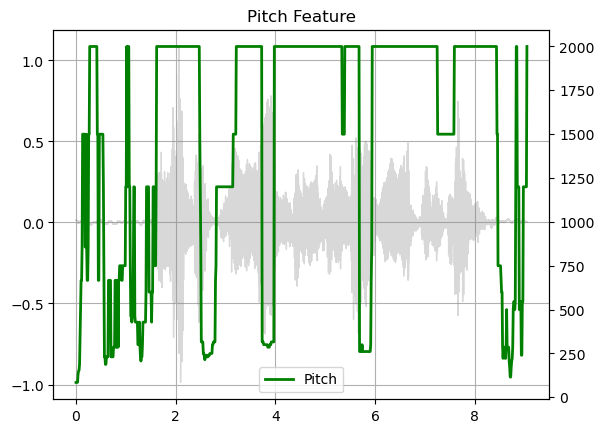

In [82]:
def plot_pitch(waveform, sample_rate, pitch):
    figure, axis = plt.subplots(1, 1)
    axis.set_title("Pitch Feature")
    axis.grid(True)

    end_time = waveform.shape[1] / sample_rate
    time_axis = torch.linspace(0, end_time,  waveform.shape[1])
    axis.plot(time_axis, waveform[0], linewidth=1, color='gray', alpha=0.3)

    axis2 = axis.twinx()
    time_axis = torch.linspace(0, end_time, pitch.shape[1])
    ln2 = axis2.plot(
        time_axis, pitch[0], linewidth=2, label='Pitch', color='green')

    axis2.legend(loc=0)
    plt.show(block=False)

pitch = F.detect_pitch_frequency(waveform, sample_rate)

plot_pitch(waveform, sample_rate, pitch)

In [83]:
n_fft = 400
win_length = None
hop_length = None

# 時頻轉換定義
spectrogram = T.Spectrogram(
    n_fft=n_fft,           
    win_length=win_length, 
    hop_length=hop_length, 
    center=True,           
    pad_mode="reflect",    
    power=None,            
)
# 進行時頻轉換
spec = spectrogram(waveform)

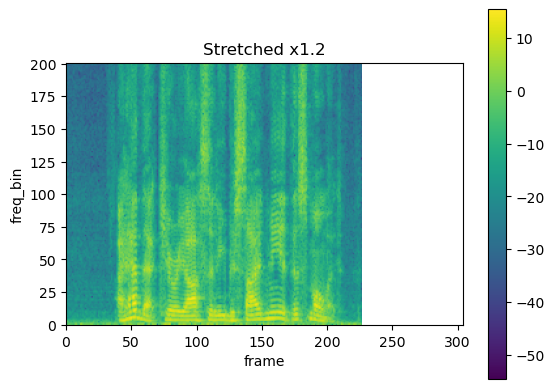

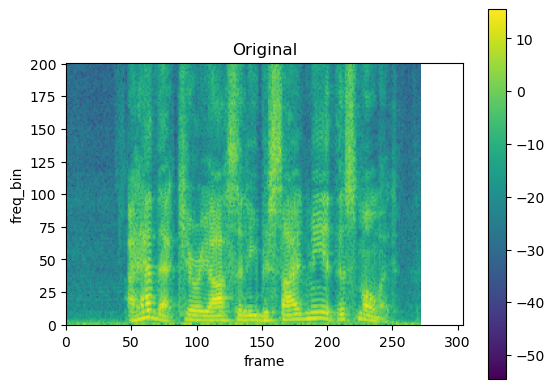

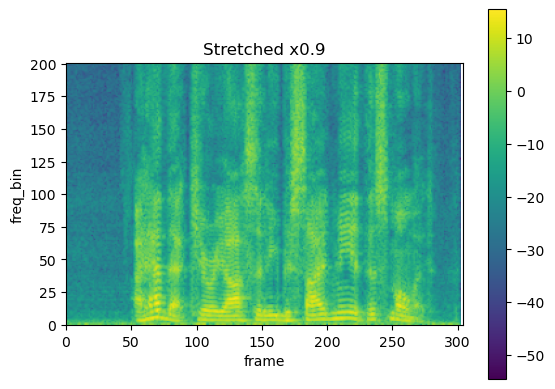

In [84]:
stretch = T.TimeStretch()
rate = 1.2
spec_ = stretch(spec, rate)
plot_spectrogram(torch.abs(spec_[0]), 
                 title=f"Stretched x{rate}", aspect='equal', xmax=304)

plot_spectrogram(torch.abs(spec[0]), 
                 title="Original", aspect='equal', xmax=304)
rate = 0.9
spec_ = stretch(spec, rate)
plot_spectrogram(torch.abs(spec_[0]), 
                 title=f"Stretched x{rate}", aspect='equal', xmax=304)